In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns;


In [25]:
df = pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [27]:
print(df.columns)

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')


In [28]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [29]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [32]:
df['Amount']=df['Amount'].astype('int')

In [34]:
df['Amount'].dtypes

dtype('int64')

EDA


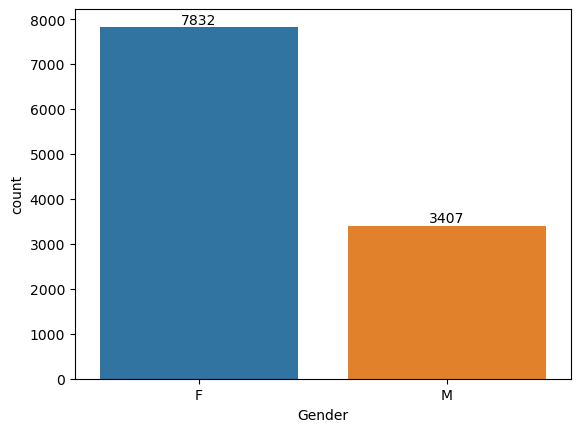

In [41]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
     ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

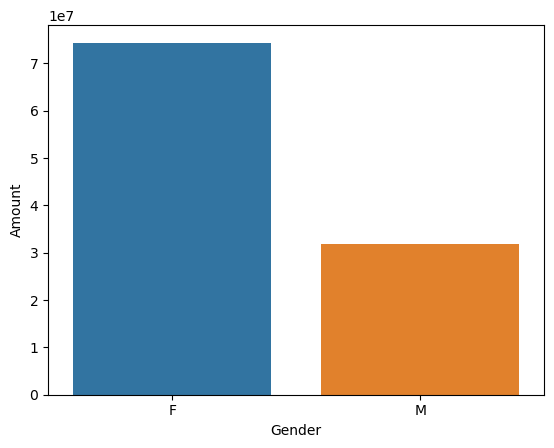

In [48]:
sale_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot( x='Gender',y='Amount',data=sale_gen)

Female purchase more as compare to men

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

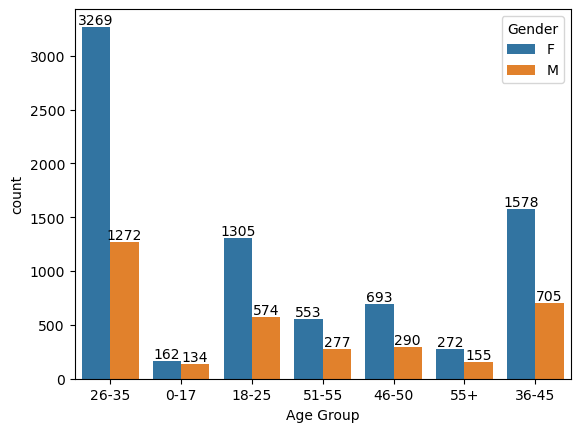

In [55]:
ax = sns.countplot(x='Age Group',hue='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

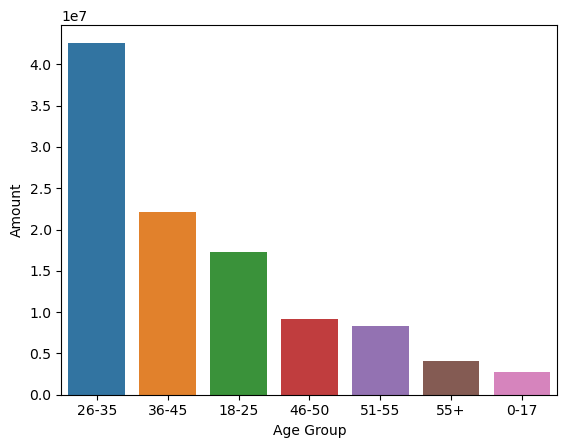

In [61]:
sale_age = df.groupby(['Age Group'], as_index=False).sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Age Group',y='Amount' ,data=sale_age)                     

By seeing we can say the female between 26 tp 35 age group are buying more as compare to other

<Axes: xlabel='State', ylabel='Orders'>

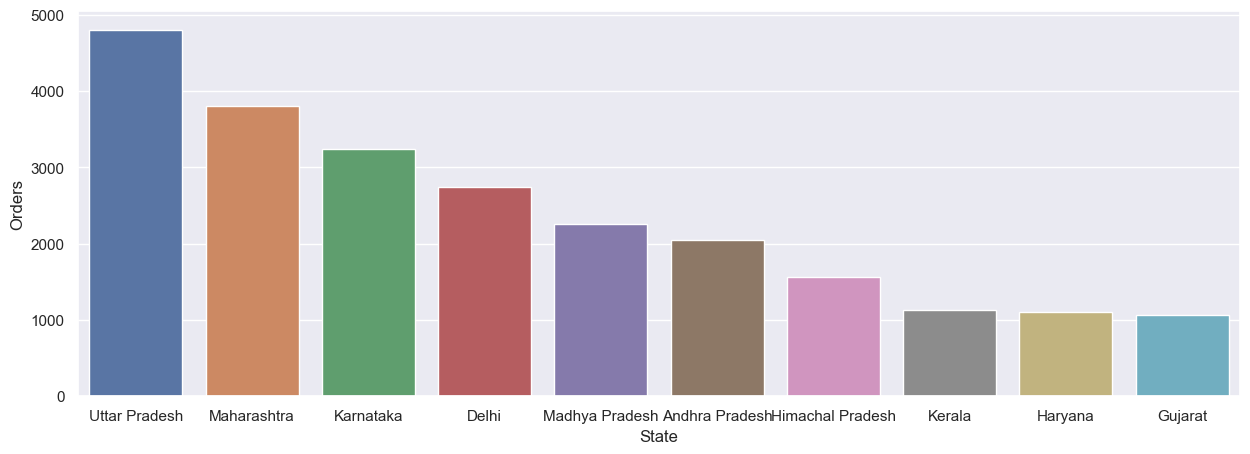

In [65]:
sale_state = df.groupby(['State'] ,as_index=False)['Orders'].sum().sort_values(by='Orders',ascending =False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sale_state,x='State',y='Orders')

Uttar pradesh is state from which we are getting more orders

<Axes: xlabel='State', ylabel='Amount'>

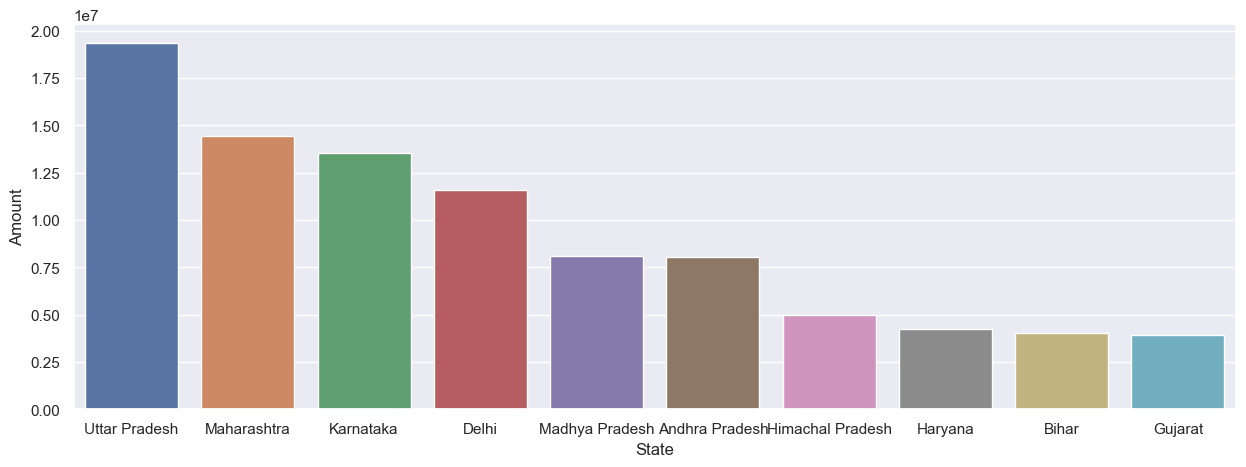

In [68]:
sale_state = df.groupby(['State'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sale_state,x='State',y='Amount')

Most of the word from up,m,k,d,..

Martial status

In [72]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

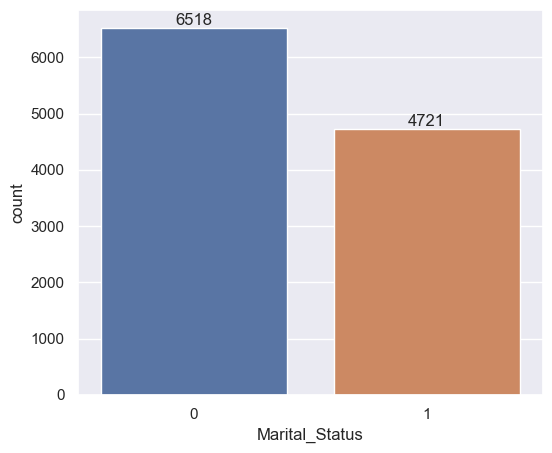

In [80]:
ax=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

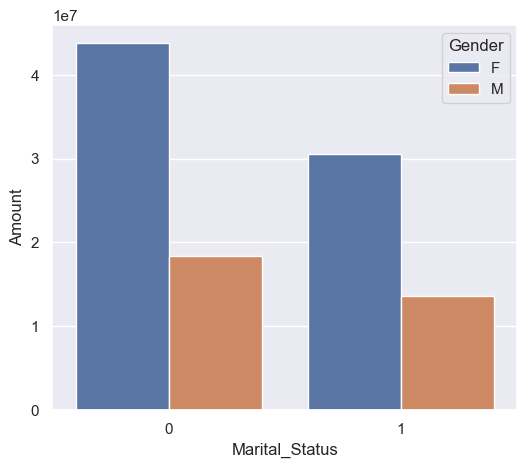

In [83]:
sale_marital_status=df.groupby(['Marital_Status','Gender'] ,as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sale_marital_status , x='Marital_Status',y='Amount',hue='Gender')

married women has more buying 

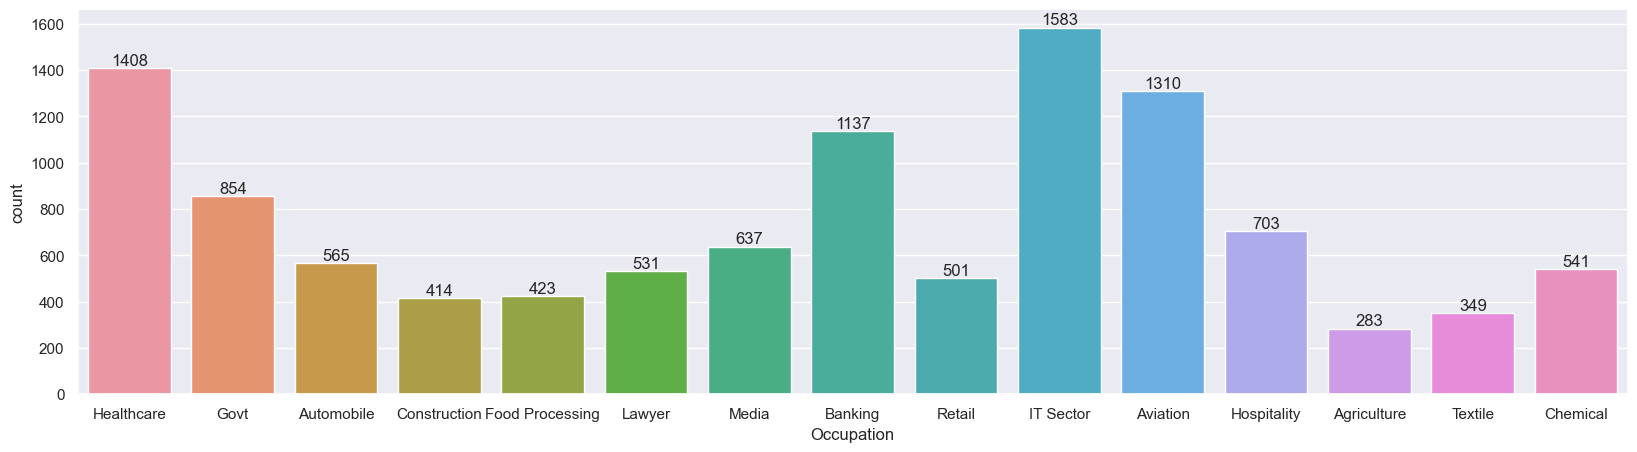

In [85]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

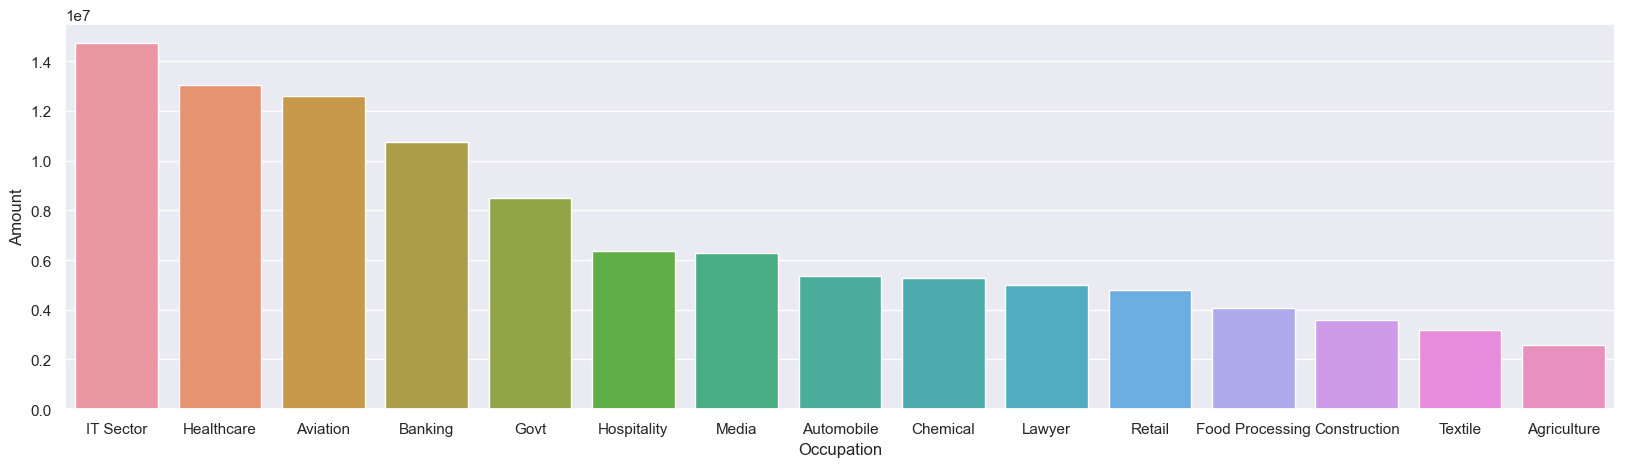

In [87]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

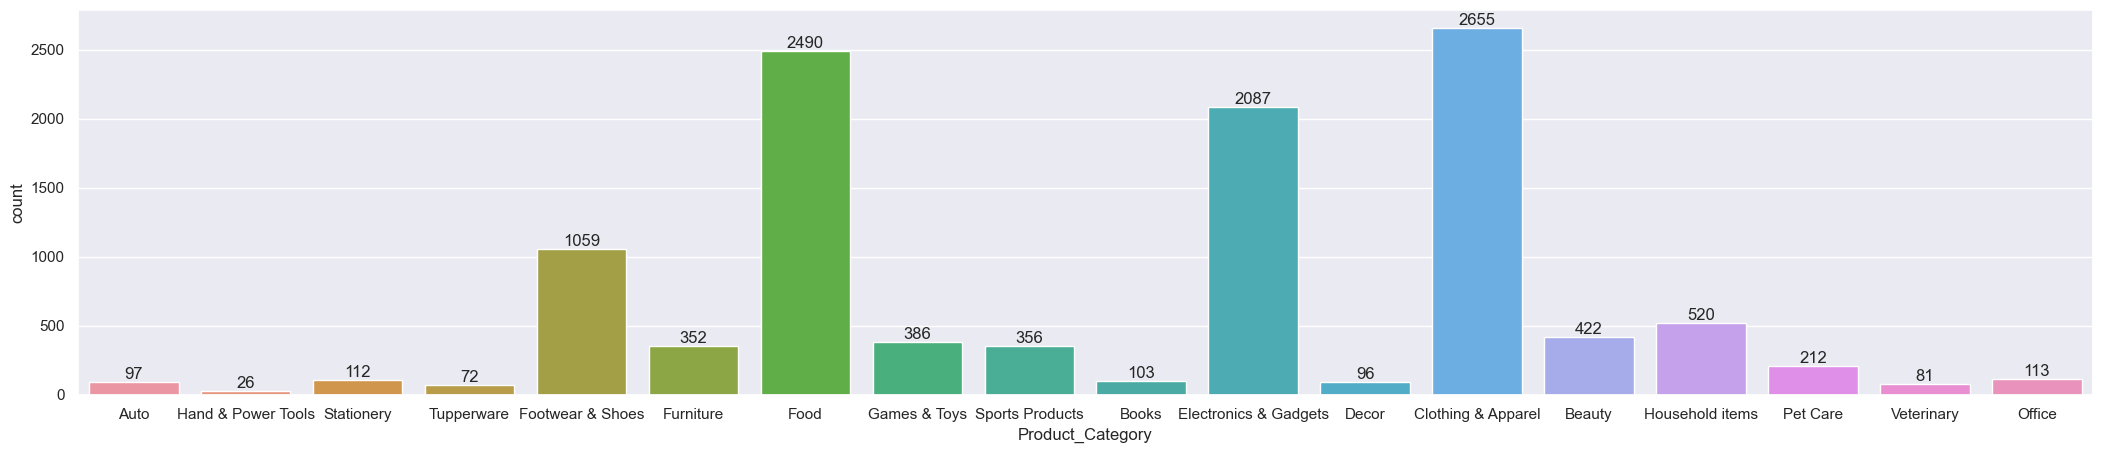

In [95]:
sns.set(rc={'figure.figsize':(26,5)})

# df.columns
ax = sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

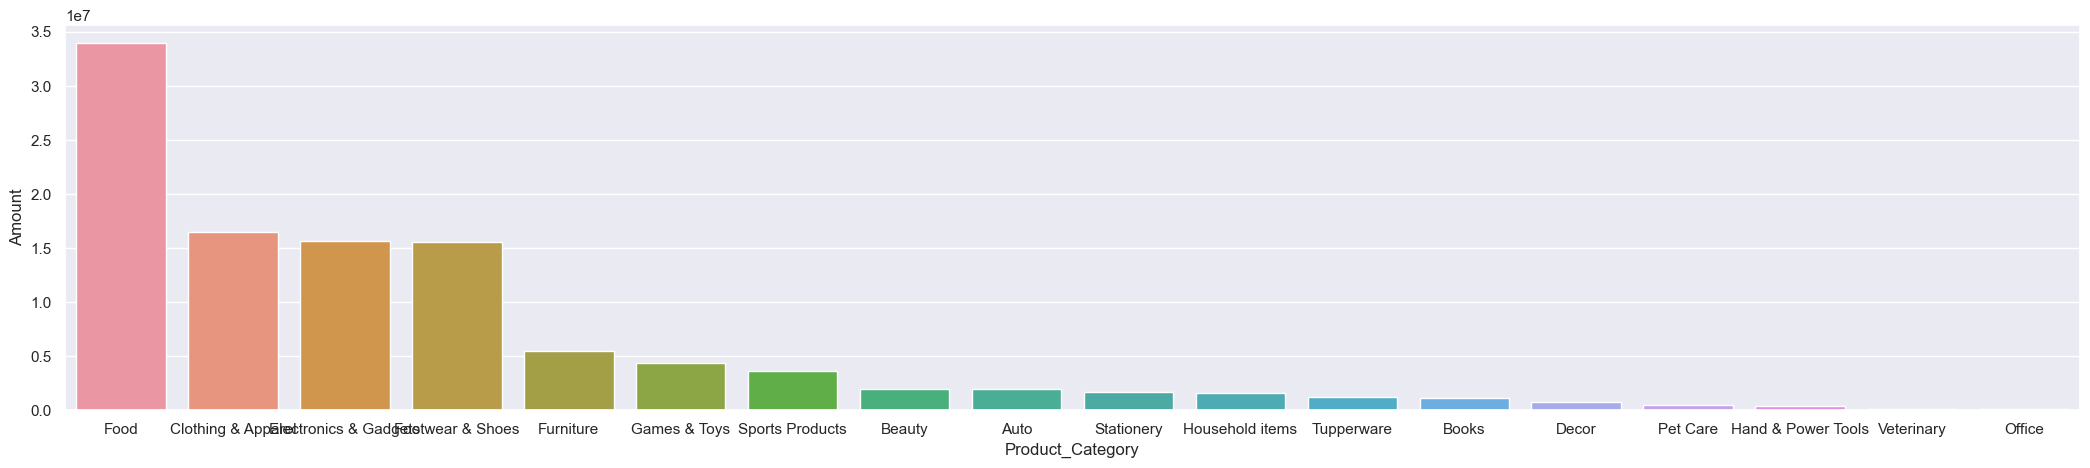

In [98]:
occp_data = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=occp_data,x='Product_Category',y='Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

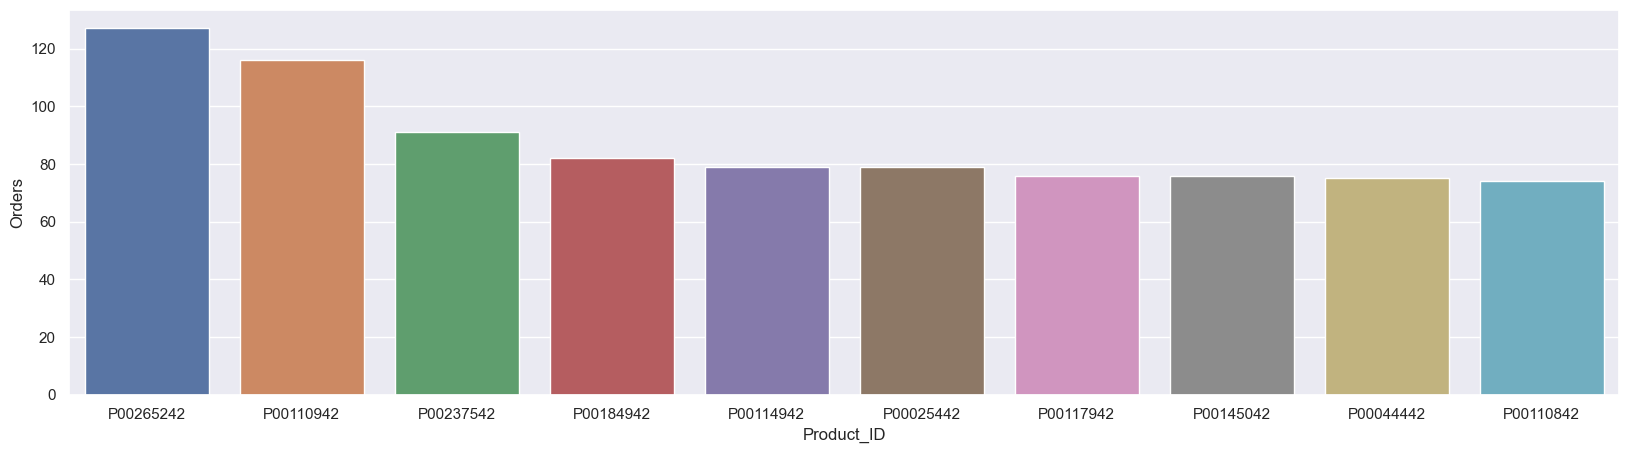

In [100]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

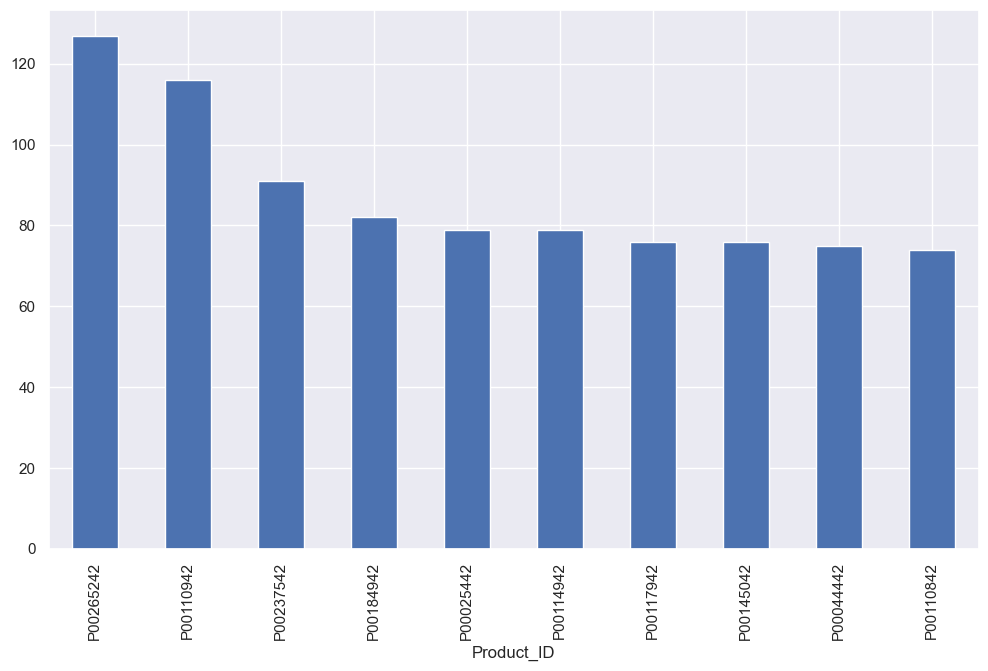

In [101]:

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*